In [25]:
import pandas as pd
import numpy as np
import time
import copy
import datetime
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict
from sklearn.naive_bayes import GaussianNB

In [59]:
course_id = 'KNU/101/2014_T2'
user_id = 50444
sm = pd.read_csv('data\courseware_studentmodule.csv')

In [60]:
users = pd.read_csv('data\users.csv')

In [61]:
cert = pd.read_csv('data\certificates_generatedcertificate.csv')

In [76]:
related_columns = sm[(sm.module_type == 'problem') & (sm.course_id == course_id)].module_id.unique()

In [63]:
sm = sm[sm.module_type == 'problem']
sm = sm.rename(columns = {'student_id':'user_id'})
sm.grade = map(lambda x: x if x != '\\b' else 0,sm.grade.tolist())
cert = cert[cert.course_id == course_id]
registered = cert.user_id.unique()
users = users[users.id.isin(registered)]

In [64]:
#fit
##__getProblemResultFeatures
start_time = time.time()
modules = sm.module_id.unique().tolist()
result = []
for module in modules:
    first = sm[sm.module_id == module].created.min()
    result.append({'name':module,'date':first})
labels = map(lambda x: x['name'],sorted(result,key=lambda x: x['date']))
rebased = sm.pivot(index='user_id',columns='module_id',values='grade')
rebased = rebased[labels].fillna(0)
res_features =  rebased
print '__getProblemResultFeatures finished in ' + str(time.time() - start_time)
##

__getProblemResultFeatures finished in 89.3380000591


In [66]:
##__getUserDataFeatures
start_time = time.time()
u = pd.DataFrame(users[['gender','year_of_birth','level_of_education']],index=users.user_id)
c = cert.set_index(cert.user_id)[['grade','status']]
c['status'] = c.apply(lambda x: 1 if x.status == 'downloadable' else 0,1)
u_features = c.join(u)
print '__getUserDataFeatures finished in ' + str(time.time() - start_time)
##

__getUserDataFeatures finished in 0.676000118256


In [67]:
len(res_features)

53013

In [68]:
##__lastPassedTest
start_time = time.time()
features = res_features.ix[user_id].tolist()
index = len(features)
for i in reversed(features):
    if i != 0:
        break
    index -= 1
if index == 0:
    index = len(res_features.columns)
last = index
print '__lastPassedTest finished in ' + str(time.time() - start_time)
##

__lastPassedTest finished in 0.00600004196167


In [69]:
start_time = time.time()
cols = res_features.columns[:last].tolist()
dataset = u_features.join(res_features)
data = dataset[cols].fillna(0)
Y = dataset.status
print '_final preparations finished in ' + str(time.time() - start_time)

_final preparations finished in 3.64800000191


In [70]:
model = GaussianNB()
start_time = time.time()
predicted = cross_val_predict(model, data, Y)
print 'cross_val_predict finished in ' + str(time.time() - start_time)

score = float(np.sum(predicted == Y))/len(data)
start_time = time.time()
model.fit(data,Y)
print 'fit finished in ' + str(time.time() - start_time)

cross_val_predict finished in 4.67900013924
fit finished in 1.35299992561


In [71]:
#predict

cols = res_features.columns.tolist()[:last]
start_time = time.time()
answer = model.predict(res_features[cols].ix[user_id].tolist())
print 'predict finished in ' + str(time.time() - start_time)
print score

predict finished in 0.570999860764
0.607830299856


C:\Users\mberezhnyak\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [58]:
#fit
##__getProblemResultFeatures
start_time = time.time()
modules = sm[sm.course_id == course_id].module_id.unique().tolist()
result = []
for module in modules:
    first = sm[sm.module_id == module].created.min()
    result.append({'name':module,'date':first})
labels = map(lambda x: x['name'],sorted(result,key=lambda x: x['date']))
rebased = sm.pivot(index='user_id',columns='module_id',values='grade')
rebased = rebased[labels].fillna(0)
res_features =  rebased
print '__getProblemResultFeatures finished in ' + str(time.time() - start_time)
##
##__getUserDataFeatures
start_time = time.time()
u = pd.DataFrame(users[['gender','year_of_birth','level_of_education']],index=users.user_id)
c = cert.set_index(cert.user_id)[['grade','status']]
c['status'] = c.apply(lambda x: 1 if x.status == 'downloadable' else 0,1)
u_features = c.join(u)
print '__getUserDataFeatures finished in ' + str(time.time() - start_time)
##
##__lastPassedTest
start_time = time.time()
features = res_features.ix[user_id].tolist()
index = len(features)
for i in reversed(features):
    if i != 0:
        break
    index -= 1
if index == 0:
    index = len(res_features.columns)
last = index
print '__lastPassedTest finished in ' + str(time.time() - start_time)
#############
start_time = time.time()
cols = res_features.columns[:last].tolist()
dataset = u_features.join(res_features)
data = dataset[cols].fillna(0)
Y = dataset.status
print '_final preparations finished in ' + str(time.time() - start_time)
##############

input = dataset.fillna(0)
output = dataset.status

#prediction test
model = GaussianNB()
start_time = time.time()
predicted = cross_val_predict(model, data, Y)
print 'cross_val_predict finished in ' + str(time.time() - start_time)

score = float(np.sum(predicted == Y))/len(data)
start_time = time.time()
model.fit(data,Y)
print 'score is {0}'.format(score)
print 'fit finished in ' + str(time.time() - start_time)

cols = res_features.columns.tolist()[:last]
start_time = time.time()
answer = model.predict(res_features[cols].ix[user_id].tolist())
print 'predict finished in ' + str(time.time() - start_time)

__getProblemResultFeatures finished in 6.3029999733
__getUserDataFeatures finished in 0.763999938965
__lastPassedTest finished in 0.00499987602234
_final preparations finished in 0.0540001392365
cross_val_predict finished in 0.0899999141693
score is 0.992078041116
fit finished in 0.0230000019073
predict finished in 0.00600004196167


C:\Users\mberezhnyak\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [72]:
ex_cols = list(cols)
ex_cols.append('status')
print ex_cols[-1]
print ex_cols[-2]

status
i4x://Prometheus/103/problem/e09fe3fb88334075b272a202f08694f8


In [73]:
dataset_x = dataset.fillna(0)[ex_cols]

baseFrame = pd.DataFrame(dataset_x.values.astype(float), columns=dataset_x.columns, index=map(lambda x: str(x) + '_x0' ,dataset_x.index.tolist()))
#for i in range(1,5):
#    currentFrame = pd.DataFrame(dataset_x.values.astype(float), columns=dataset_x.columns, index=map(lambda x: str(x) + '_x' + str(i) ,dataset_x.index.tolist()))
#    baseFrame = pd.concat([baseFrame, currentFrame])

In [74]:
print len(cols)
print len(baseFrame.columns)
print len(baseFrame)

1076
1077
15274


In [19]:
input = baseFrame[cols]
output = baseFrame.status

#prediction test
model = GaussianNB()
start_time = time.time()
predicted = cross_val_predict(model, input, output)
print 'cross_val_predict finished in ' + str(time.time() - start_time)

score = float(np.sum(predicted == output))/len(input)
start_time = time.time()
model.fit(input,output)
print 'fit finished in ' + str(time.time() - start_time)

cols = res_features.columns.tolist()[:last]
start_time = time.time()
answer = model.predict(res_features[cols].ix[user_id].tolist())
print 'predict finished in ' + str(time.time() - start_time)

cross_val_predict finished in 11.6229999065
fit finished in 3.16700005531
predict finished in 0.612999916077


In [21]:
dataset_x.to_csv('data\dummy\dataset_x.csv')

In [25]:
a = pd.DataFrame([[1,1,1],[1,1,1]], columns=['one','two','three'])
a

,one,two,three
0,1,1,1
1,1,1,1


In [26]:
#a.to_csv('a.csv',index=False)
#b = pd.DataFrame([[2,2,2],[2,2,2]], columns=['one','two','three'])
#with open('a.csv', 'a') as f:
#    b.to_csv(f, header=False,index=False)

In [79]:
related_columns_with_status = list(related_columns)
related_columns_with_status.append('status')
related_columns_with_status
dataset_reduced = dataset_x[related_columns_with_status]

In [81]:
#for i in range(0,17):
#    name = 'data\dummy\ds_x{0}.csv'.format(i*5)
#    dataset_reduced.to_csv(name, index=False)
#    for j in range(1, i*5):
#        with open(name, 'a') as f:
#            dataset_reduced.to_csv(f, header=False,index=False)

In [94]:
r = []
a = [1,2,3]
r.append(a)
a = [4,5,6]
r.append(a)
a = [7,8,9]
r.append(a)
df = pd.DataFrame(r)
df.to_csv('data\\test.csv',header=False,index=False,sep='\t')

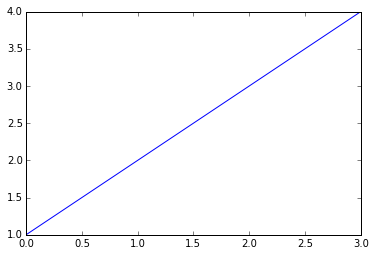

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1,2,3,4])
plt.show()

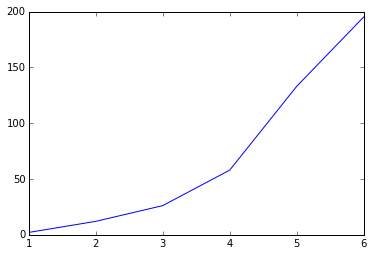

In [7]:
plt.plot([i+1 for i in range(0,len(cross_validation_timing))],cross_validation_timing)

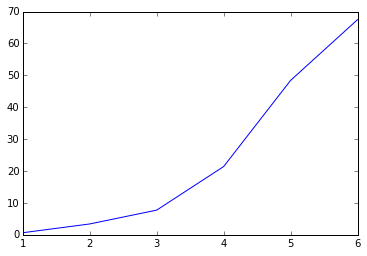

In [8]:
plt.plot([i+1 for i in range(0,len(fit_timing))],fit_timing)

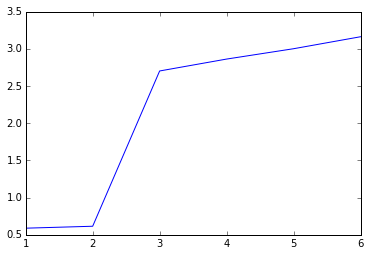

In [9]:
plt.plot([i+1 for i in range(0,len(predict_timing))],predict_timing)

In [11]:
195/60

3

In [16]:
from distributed.joblib import DistributedBackend

ImportError: cannot import name PY3

In [2]:
name = 'data\dummy\ds_x0.csv'
df = pd.read_csv(name)

In [5]:
print len(df[df.status == 1]) * 100.0 /len(df)

8.59630745057


In [11]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

In [15]:
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(df[df.columns.tolist()[:-1]], df.status)

In [23]:
print len(filter(lambda x: x == 1,y_resampled.astype(float).tolist())) * 100.0 /len(y_resampled)

50.0


In [24]:
len(y_resampled)

2626